In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [11]:
train_dir = "/kaggle/input/garbage-classification/Garbage classification/Garbage classification/"

In [12]:
# image data generator for train
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(300, 300), 
  batch_size=64,
  class_mode='categorical'     
)

Found 2527 images belonging to 6 classes.


# Modeling

In [28]:
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(300, 300, 3),
)
# model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 306, 306,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 150, 150,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 150, 150,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 150, 150,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 152, 152,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 75, 75,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 75, 75,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 75, 75,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 75, 75,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 75, 75,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 75, 75,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 75, 75,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 75, 75,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 75, 75,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 75, 75,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 75, 75,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [29]:
# freeze the layer from pretrained model
for layer in model.layers:
    layer.trainable = False

In [32]:
# get the last layer
last_layer = model.get_layer("conv5_block3_out")
last_output = last_layer.output

# create final layer for our classifier
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

In [35]:
final_model = tf.keras.Model(
    inputs=model.input,
    outputs=x
)

final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# final_model.summary()

In [40]:
history = final_model.fit(
    train_generator,
    epochs=5
)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 281ms/step - accuracy: 0.2887 - loss: 1.6438
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.2903 - loss: 1.6458
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 288ms/step - accuracy: 0.3120 - loss: 1.6317
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.3191 - loss: 1.6078
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.3261 - loss: 1.5874


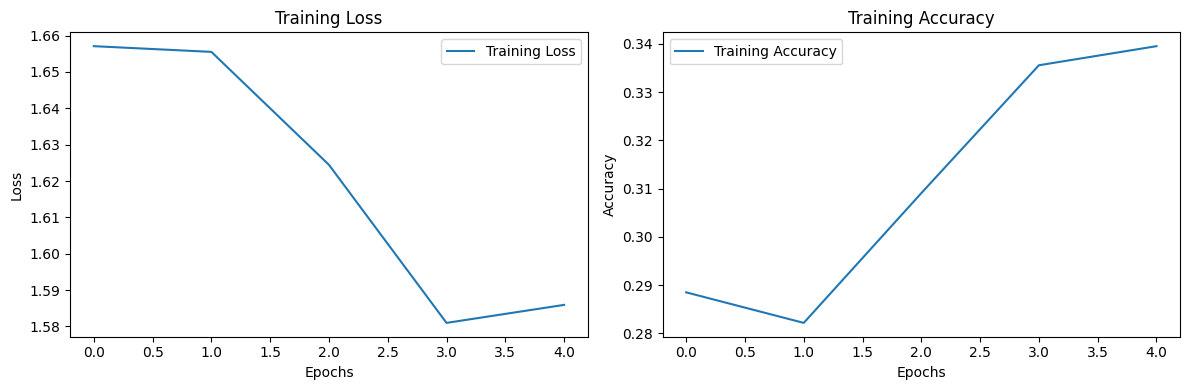

In [41]:
import matplotlib.pyplot as plt

# Plotting the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save Model

In [44]:
final_model.save_weights('model.weights.h5')

# Load Model

In [45]:
loaded_model = tf.keras.Model(
    inputs=model.input,
    outputs=x
)

loaded_model.load_weights("/kaggle/working/model.weights.h5")

# Prediction

In [51]:
import cv2

img = cv2.imread("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard10.jpg")
img = cv2.resize(img, (300, 300))
img = np.array(img)
img = img.reshape(-1, 300, 300, 3)  

In [53]:
loaded_model.predict(img).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0